# Problem 7

In [57]:
import numpy as np

# given x's
x = np.array([0.1,0.2,0.3,0.4])

# given f(x) are a
a = np.array([-0.62049958,-0.28398668,0.00660095,0.24842440])

# h is the same -> 0.1
h = 0.1

# A matrix - 4x4 matrix
matA = np.zeros([4,4])
# change elements
matA[0,0] = 1
matA[3,3] = 1
# make middle row
for i in range(2):
    matA[1+i,i] = h
    matA[1+i,i+1] = 4*h
    matA[1+i,i+2] = h

# make z array
z = np.array([0])
for i in range(2):
    res = (3/h)*(a[i+2]-a[i+1]) - (3/h)*(a[i+1]-a[i])
    z = np.append(z,res)
z = np.append(z, 0)

# get c array
c = np.linalg.solve(matA,z)

# get b
b = np.array([])
for i in range(len(c)-1):
    res = ((a[i+1]-a[i])/h) - ((h*(c[i+1] + 2*c[i]))/(3))
    b = np.append(b,res)

# get d
d = np.array([])
for i in range(len(c)-1):
    res = (c[i+1] - c[i]) / (3*h)
    d = np.append(d,res)

# print results
print(a,b,c,d, sep = "\n")

[-0.62049958 -0.28398668  0.00660095  0.2484244 ]
[3.45508693 3.18521313 2.61707643]
[ 0.       -2.698738 -2.982629  0.      ]
[-8.99579333 -0.94630333  9.94209667]


The results from the code imply that the cubic spline equations are as follows:

\begin{gather*}
S_0(x) = -0.62049958 + 3.45508693(x-0.1) - 8.99579333(x-0.1)^3; 0.1 \leq x < 0.2 \\\\

S_1(x) = -0.28398668 + 3.18521313(x-0.2) - 2.698738(x-0.2)^2 - 0.94630333(x-0.2)^3; 0.2 \leq x < 0.3 \\\\

S_2(x) = 0.00660095 + 2.61707643(x-0.3) - 2.982629(x-0.3)^2 + 9.94209667(x-0.3)^3; 0.3 \leq x < 0.4 \\\\
\end{gather*}

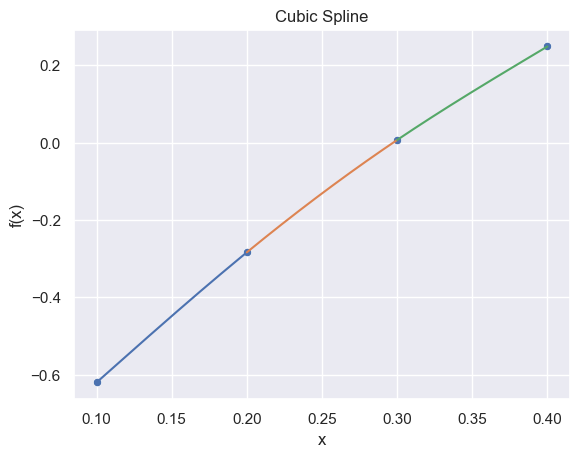

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the equations
sfunc0 = lambda x : -0.62049958 + 3.45508693*(x-0.1) - 8.99579333*(x-0.1)**3

sfunc1 = lambda x : -0.28398668 + 3.18521313*(x-0.2)  - 2.698738*(x-0.2)**2 - 0.94630333*(x-0.2)**3 

sfunc2 = lambda x : 0.00660095 + 2.61707643*(x-0.3) - 2.982629*(x-0.3)**2 + 9.94209667*(x-0.3)**3 

# given x's
x = np.array([0.1,0.2,0.3,0.4])

# given f(x) 
fx = np.array([-0.62049958,-0.28398668,0.00660095,0.24842440])

# make figure and axis
fig, ax = plt.subplots()

sns.set_theme()

# plot given points
sns.scatterplot(x = x, y = fx)

# make continuous data
x_0 = np.linspace(0.1,0.2,1000)
y_0 = sfunc0(x_0)
x_1 = np.linspace(0.2,0.3,1000)
y_1 = sfunc1(x_1)
x_2 = np.linspace(0.3,0.4,1000)
y_2 = sfunc2(x_2)

# plot lines
sns.lineplot(x = x_0, y = y_0)
sns.lineplot(x = x_1, y = y_1)
sns.lineplot(x = x_2, y = y_2)

ax.set_title("Cubic Spline")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

plt.show()

In [59]:
sfunc1(0.25)

-0.13159115641625

Using the spline equation $S_1(x)$, f(0.25) is estimated to be about -0.13159.